In [3]:
#fazer a conexão com o google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [1]:
#Instalando biblioteca para conectar ao google sheets
!pip install --quiet gspread oauth2client

import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [5]:
#autenticando o json no google drive

json_path = '/content/gdrive/My Drive/bigdata/xapuriavaliacoes.json'

escopo = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]

from oauth2client.service_account import ServiceAccountCredentials
import gspread

creds = ServiceAccountCredentials.from_json_keyfile_name(json_path, escopo)
cliente = gspread.authorize(creds)


In [6]:
#acessar a planilha do google sheets

planilha = cliente.open("avaliacoes_estabelecimento_atualizado")
aba = planilha.worksheet("Respostas ao formulário 1")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dados = aba.get_all_records()
df = pd.DataFrame(dados)
df

,data/hora,bebida,comida,tempo_espera,atendimento,estabelecimento,Observações
0,13/06/2025 00:18:35,5,4,4,5,4,
1,13/06/2025 00:15:37,4,4,3,5,4,
2,,4,5,5,4,5,
3,,3,5,5,4,5,
4,,3,3,5,5,4,
...,...,...,...,...,...,...,...
2854,,4,5,3,5,4,
2855,,3,5,5,5,5,
2856,,5,5,5,5,4,
2857,,3,5,3,5,5,


In [7]:
#mostra as primeiras linhas
df.head()

,data/hora,bebida,comida,tempo_espera,atendimento,estabelecimento,Observações
0,13/06/2025 00:18:35,5,4,4,5,4,
1,13/06/2025 00:15:37,4,4,3,5,4,
2,,4,5,5,4,5,
3,,3,5,5,4,5,
4,,3,3,5,5,4,


In [8]:
#mostra as ultimas linhas
df.tail()

,data/hora,bebida,comida,tempo_espera,atendimento,estabelecimento,Observações
2854,,4,5,3,5,4,
2855,,3,5,5,5,5,
2856,,5,5,5,5,4,
2857,,3,5,3,5,5,
2858,,4,4,4,5,3,


In [ ]:
#mostra linhas aleatorias
df.sample()

In [ ]:
#mostra os nomes das colunas
df.columns

Index(['Carimbo de data/hora', 'bebida', 'comida', 'tempo_espera',
       'atendimento', 'estabelecimento', 'Observações'],
      dtype='object')

In [ ]:
#mostra as colunas citadas abaixo
df[['bebida', 'comida']]

,bebida,comida
0,5,4
1,4,4
2,4,5
3,3,5
4,3,3
...,...,...
2854,4,5
2855,3,5
2856,5,5
2857,3,5


In [ ]:
#cria uma separação com as colunas
Alimentação=df[['bebida', 'comida']]

In [10]:
#resultado
Alimentação

NameError: name 'Alimentação' is not defined

In [ ]:
#Contar os valores parecidos de cada coluna
df['comida'].value_counts()

,count
comida,
5,1752
4,852
3,255


In [ ]:
#somar toda a coluna
df['comida'].sum()

In [ ]:
#media aritimetica de toda a coluna
df['bebida'].mean()

In [ ]:
#media mediana de toda a coluna
df['estabelecimento'].median()

5.0

In [ ]:
#define um filtro
df.loc[df["bebida"] == 5]

,Carimbo de data/hora,bebida,comida,tempo_espera,atendimento,estabelecimento,Observações
0,13/06/2025 00:18:35,5,4,4,5,4,
8,,5,5,4,4,5,A comida demorou um pouco.
9,,5,5,5,5,3,
10,,5,5,5,5,4,A sobremesa estava maravilhosa.
13,,5,5,5,5,5,Banheiro limpo.
...,...,...,...,...,...,...,...
2840,,5,5,5,5,5,
2843,,5,5,4,5,3,
2844,,5,5,5,5,5,
2851,,5,5,5,5,4,


In [9]:
#descreve tudo (numericamente)
df['atendimento'].describe()

,atendimento
count,2859.000000
mean,4.505072
std,0.668358
min,3.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
#mostra as celulas vazias
df.isnull()

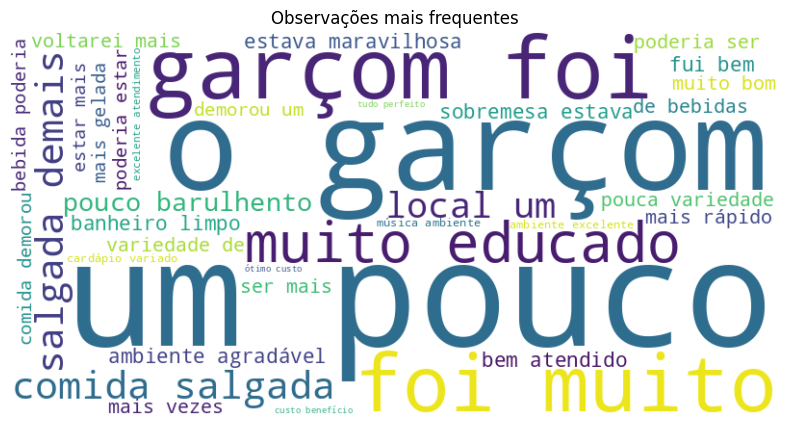

In [11]:
#gráfico de observações
from wordcloud import WordCloud

texto = ' '.join(df['Observações'].dropna()).lower()

texto = texto.replace("achei o", "")

nuvem = WordCloud(background_color='white', width=800, height=400).generate(texto)

plt.figure(figsize=(15, 5))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
plt.title('Observações mais frequentes')
plt.show()

In [ ]:
'O objetivo de integrar o Google Colab com uma planilha do Google Sheets é automatizar a coleta de dados'
'provenientes de formulários do Google Forms, permitindo que as respostas dos clientes sejam registradas em'
'tempo real e estejam imediatamente disponíveis para análise estatística e visualização no ambiente de'
'desenvolvimento.'

'Link do forms: https://forms.gle/YsSNHmvU3iKv3woU7'
'Link do google sheets: https://docs.google.com/spreadsheets/d/1rlI8mmQ1eYTXoLLJ_XVHgU8CgjwVPDCmrFZN0Fbmta4/edit?usp=sharing'